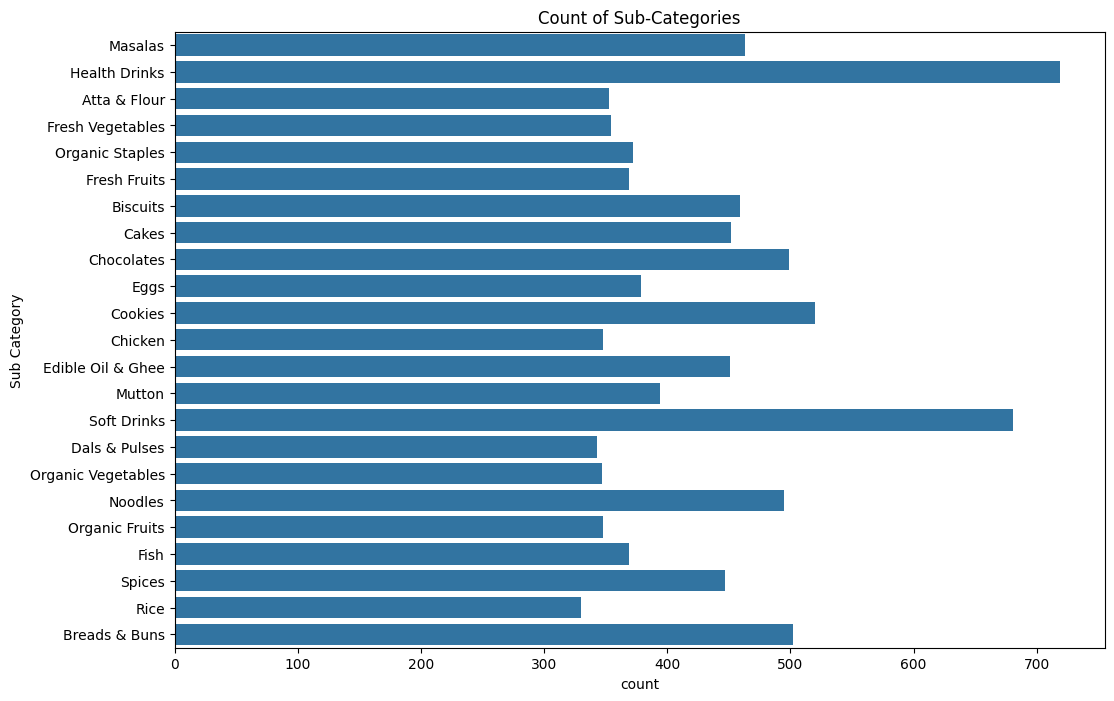

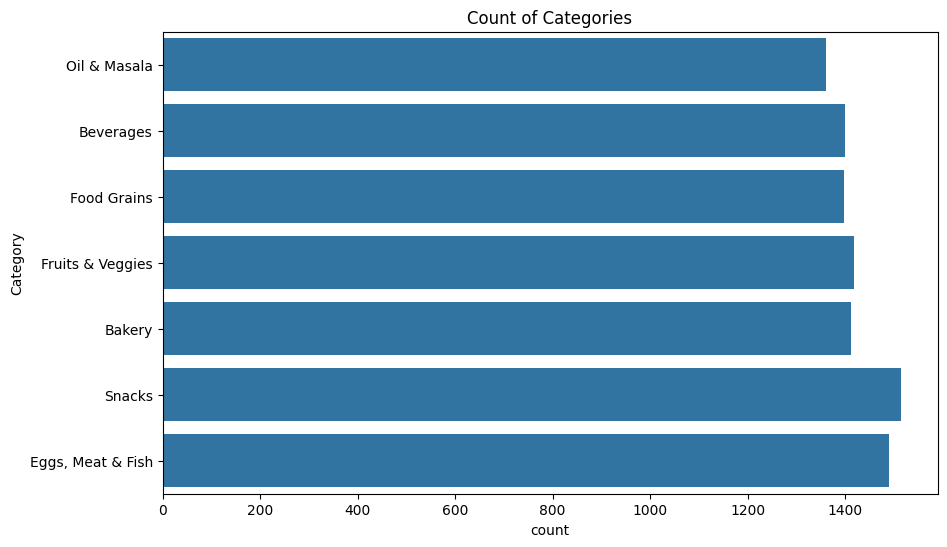

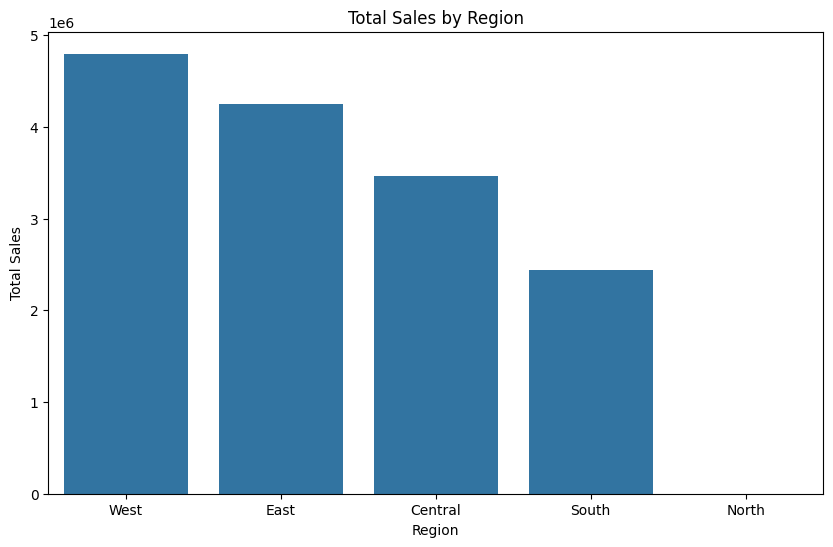

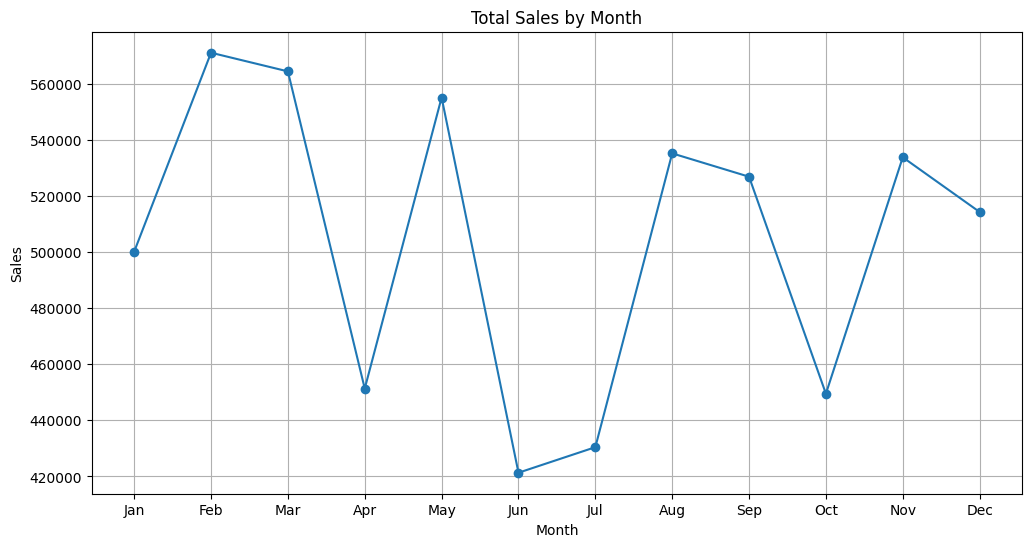

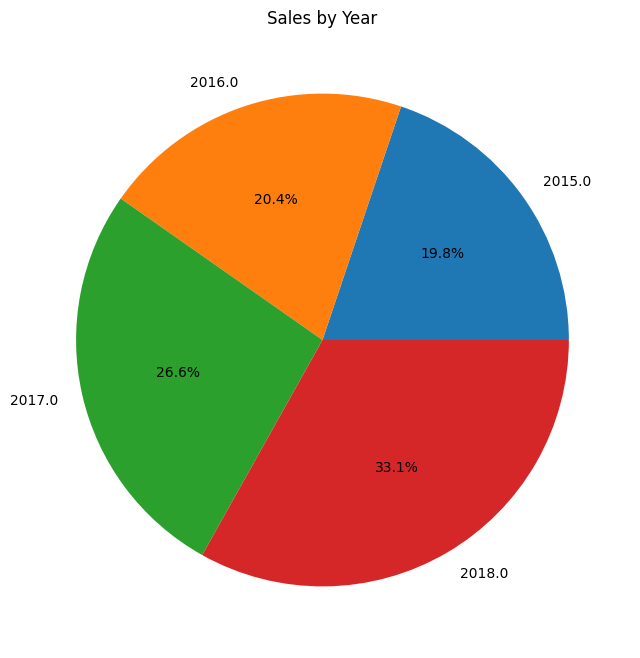

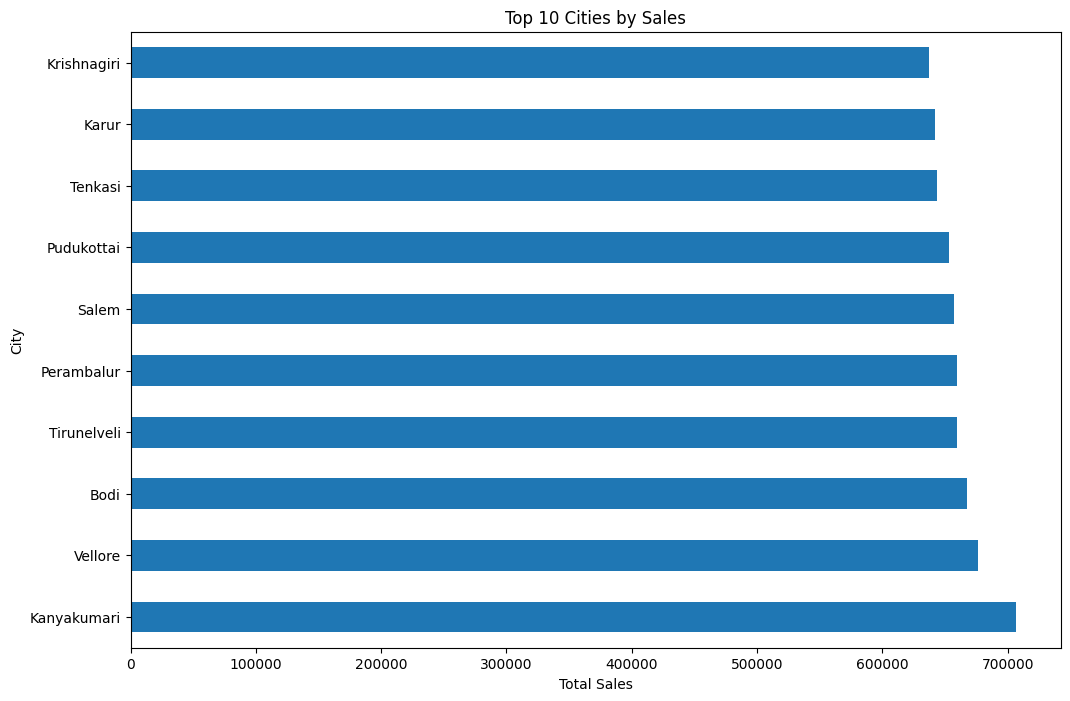

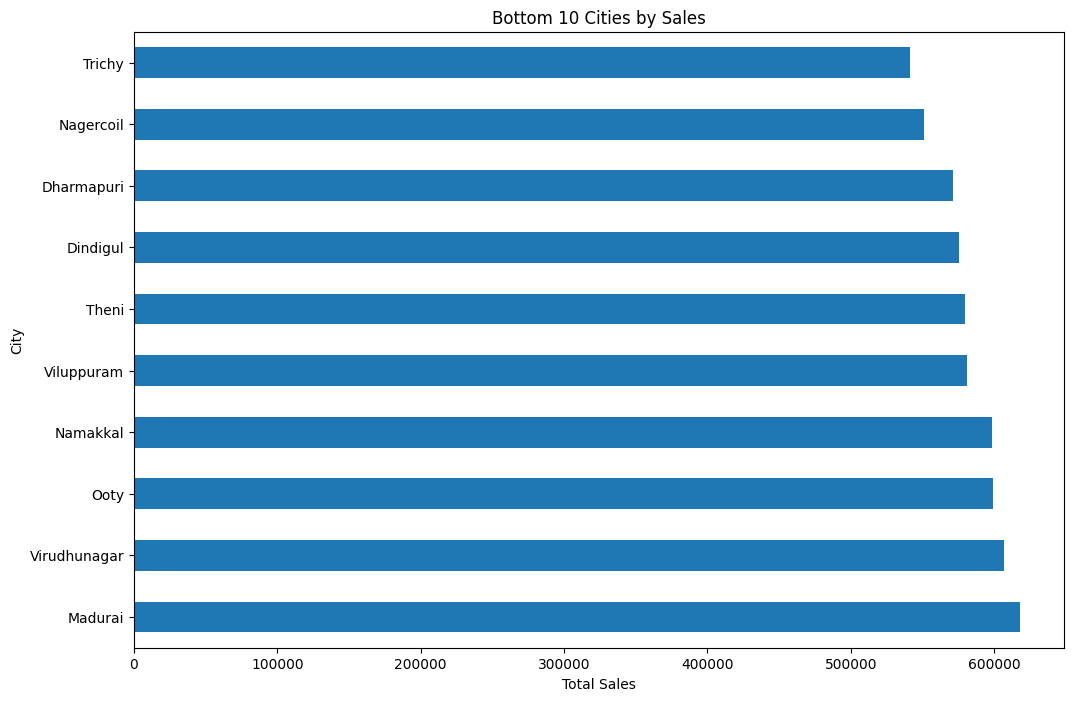

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')

# Convert 'Order Date' to datetime objects, trying multiple formats for robustness
try:
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y', errors='coerce')
except Exception:
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y', errors='coerce')


# --- Graph 1: Sub-Category Count Plot ---
plt.figure(figsize=(12, 8))
sns.countplot(y=df['Sub Category'])
plt.title('Count of Sub-Categories')
plt.show()

# --- Graph 2: Category Count Plot ---
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Category'])
plt.title('Count of Categories')
plt.show()

# --- Graph 3: Sales by Region ---
plt.figure(figsize=(10, 6))
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

# --- Graph 4: Sales by Month ---
df['month_no'] = df['Order Date'].dt.month
monthly_sales = df.groupby('month_no')['Sales'].sum().reset_index()
monthly_sales_sorted = monthly_sales.sort_values('month_no')
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_sorted['month_no'], monthly_sales_sorted['Sales'], marker='o')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(ticks=monthly_sales_sorted['month_no'], labels=month_names)
plt.grid(True)
plt.show()

# --- Graph 5: Sales by Year ---
df['year'] = df['Order Date'].dt.year
yearly_sales = df.groupby('year')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(yearly_sales, labels=yearly_sales.index, autopct='%1.1f%%')
plt.title('Sales by Year')
plt.show()

# --- Graph 6: Top 10 Cities by Sales ---
city_sales = df.groupby('City')['Sales'].sum()
sorted_cities = city_sales.sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sorted_cities.head(10).plot(kind='barh')
plt.title('Top 10 Cities by Sales')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()

# --- Graph 7: Bottom 10 Cities by Sales ---
plt.figure(figsize=(12, 8))
sorted_cities.tail(10).plot(kind='barh')
plt.title('Bottom 10 Cities by Sales')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()